# Some EDAs

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skew

In [3]:
games = pd.read_csv('../Data/CSV_files/games_bets_ready4FE')
del games['Unnamed: 0']

def game_over_under(row) :
    if row['total_line'] > row['total_score'] :
        row['over_under'] = -1
    elif row['total_line'] == row['total_score'] :
        row['over_under'] = 0
    else :
        row['over_under'] = 1
    return row
games = games.apply(game_over_under,axis=1)

#games

In [8]:
games.total_score.describe()

count    5989.000000
mean      200.331274
std        18.980102
min       134.000000
25%       187.000000
50%       200.000000
75%       213.000000
max       275.000000
Name: total_score, dtype: float64

In [9]:
games.total_line.describe()

count    5989.000000
mean      201.327016
std         9.990943
min       170.500000
25%       194.000000
50%       201.000000
75%       208.000000
max       242.000000
Name: total_line, dtype: float64

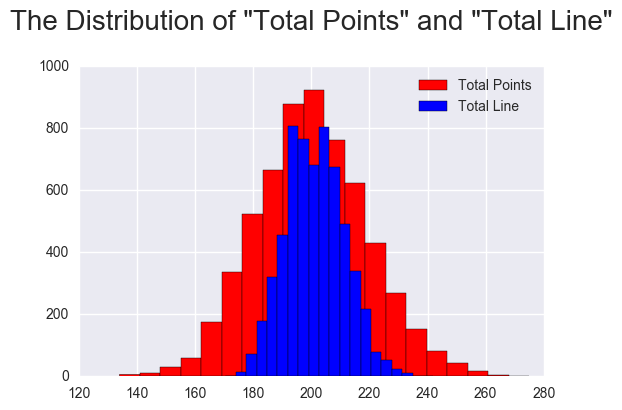

In [23]:
ax, fig = plt.subplots(figsize=(6,4))
games.total_score.hist(bins = 20,color = 'red')
games.total_line.hist(bins = 20,color = 'blue')
plt.title('The Distribution of "Total Points" and "Total Line"\n',size=20)
#plt.xlabel('Total Points')
plt.legend(['Total Points', 'Total Line'])
plt.savefig('../Pictures/distribution.png', bbox_inches='tight')
plt.show()

/Users/behdad/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


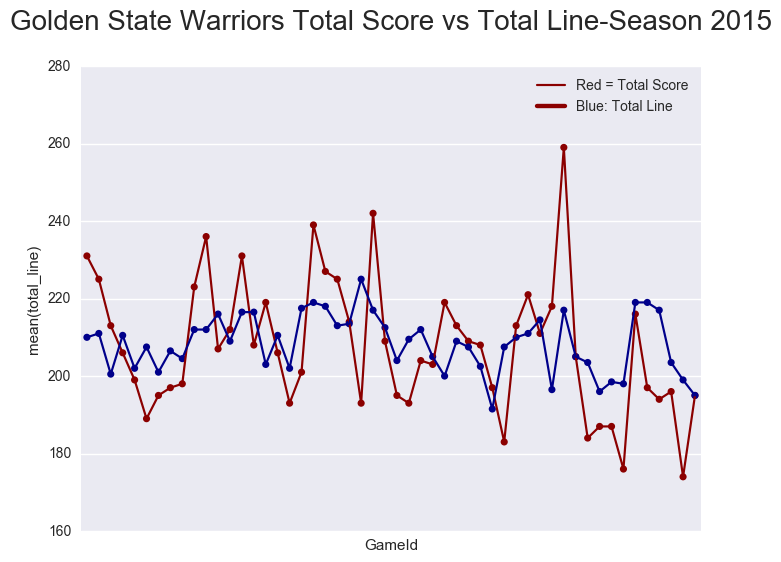

In [126]:
GSW = games[['GameId','HostName','GuestName','total_line','total_score']][games.HostName == 'Golden State Warriors'][games.Season == 2015]

f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x= 'GameId',y = 'total_score',color='darkred',data=GSW,scale=0.5)
sns.pointplot(x= 'GameId',y = 'total_line',color='darkblue',data=GSW,scale=0.5)
plt.title('Golden State Warriors Total Score vs Total Line-Season 2015\n',size = 20)
plt.legend(['Red = Total Score', 'Blue: Total Line'])
plt.xticks([])
plt.show()

/Users/behdad/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


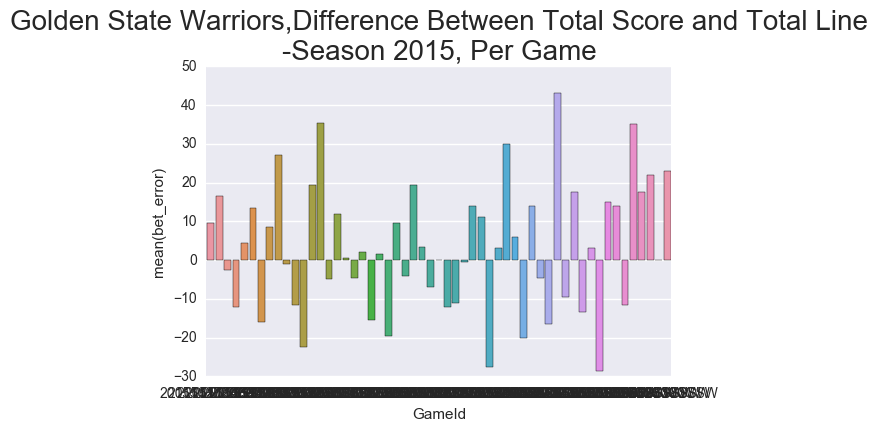

In [30]:
GSW = games[['GameId','HostName','GuestName','total_line','total_score']][games.HostName == 'Golden State Warriors'][games.Season == 2016]
GSW['bet_error'] = GSW.total_line - GSW.total_score

f, ax = plt.subplots(figsize=(6, 4))
#sns.pointplot(x= 'GameId',y = 'bet_error',data=GSW,scale=0.5)
sns.barplot(x= 'GameId',y = 'bet_error',data=GSW)
plt.title('Golden State Warriors,Difference Between Total Score and Total Line\n-Season 2015, Per Game',size = 20)
plt.show()

/Users/behdad/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


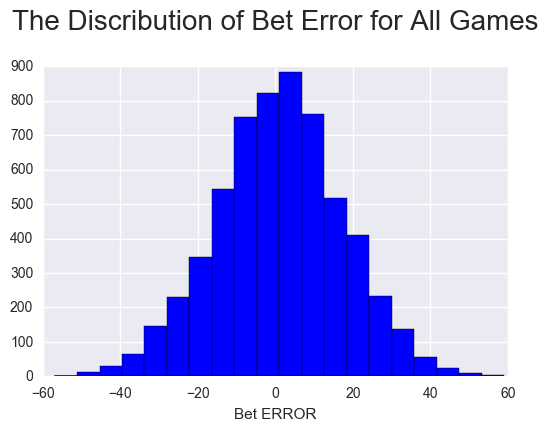

In [22]:
GSW = games[['GameId','HostName','GuestName','total_line','total_score']]#[games.HostName == 'Golden State Warriors'][games.Season == 2015]
GSW['bet_error'] = GSW.total_line - GSW.total_score

ax, fig = plt.subplots(figsize=(6,4))
GSW.bet_error.hist(bins = 20,color = 'blue')
plt.title('The Discribution of Bet Error for All Games\n',size=20)
plt.xlabel('Bet ERROR')
plt.savefig('../Pictures/beterror.png', bbox_inches='tight')
plt.show()

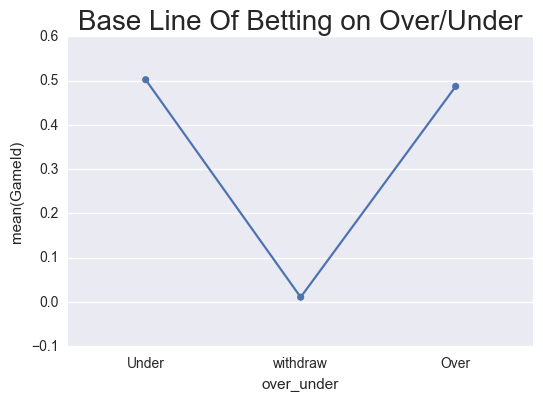

In [21]:
over_under = games[['over_under','GameId']][games.Season == 2017].groupby('over_under').count().reset_index()
over_under.GameId = over_under.GameId / over_under.GameId.sum()
over_under.over_under = over_under.over_under.apply(lambda x: 'Over' if x==1 else 'withdraw' if x==0  else 'Under')
f, ax = plt.subplots(figsize=(6, 4))
sns.pointplot(x= 'over_under',y = 'GameId',data=over_under,scale=0.5)
plt.title('Base Line Of Betting on Over/Under',size = 20)
plt.savefig('../Pictures/baseline.png', bbox_inches='tight')
plt.show()

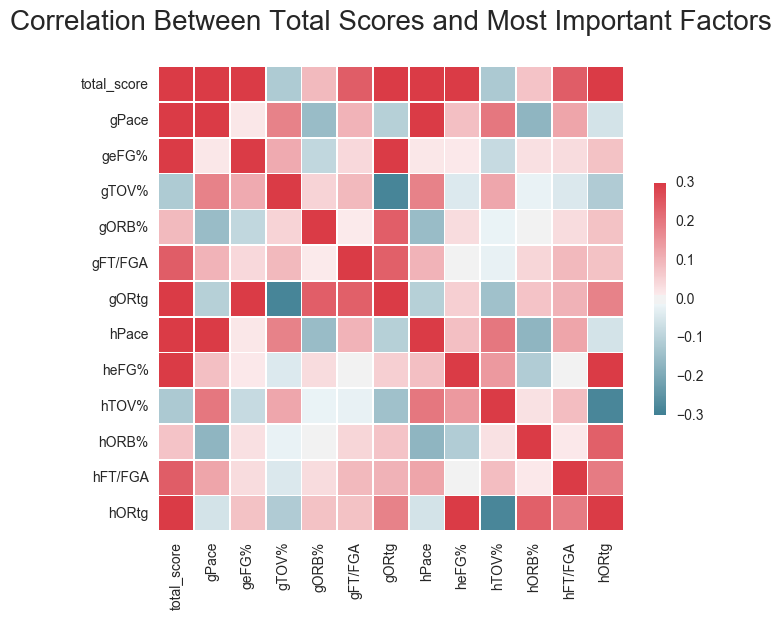

In [76]:
games_corr = games[['total_score','gPace','geFG%','gTOV%','gORB%','gFT/FGA','gORtg','hPace','heFG%','hTOV%','hORB%','hFT/FGA','hORtg']]
f, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(games_corr.corr(), cmap=cmap, vmax=.3,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Correlation Between Total Scores and Most Important Factors\n',size=20)
plt.show()


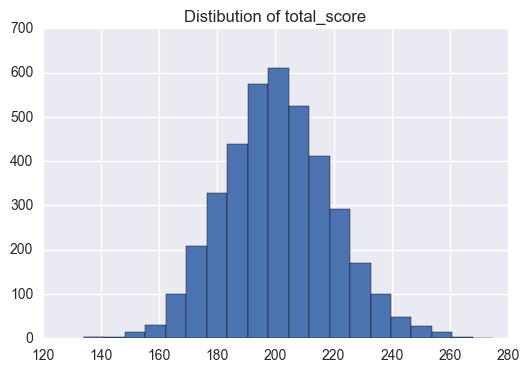

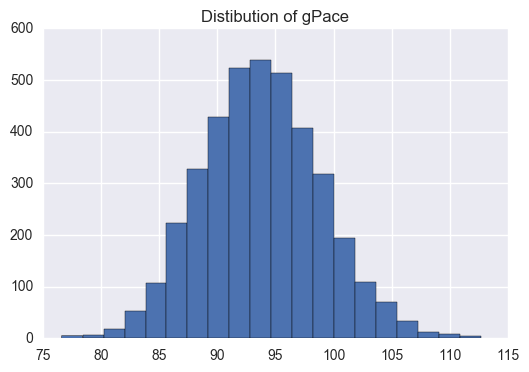

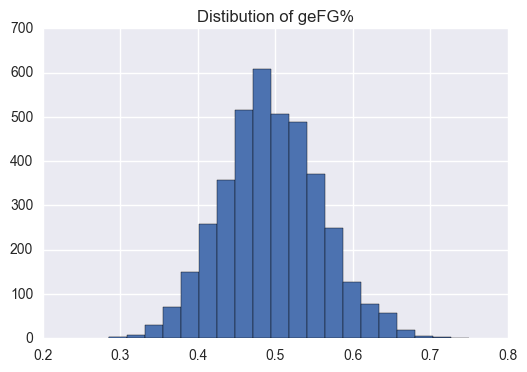

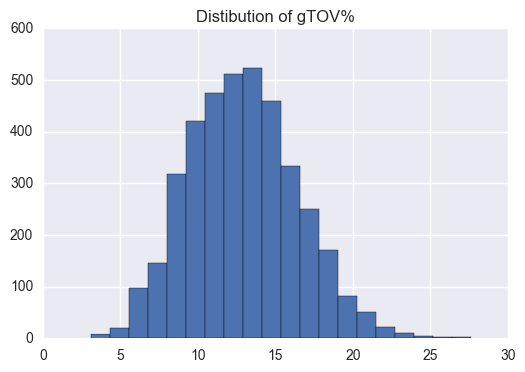

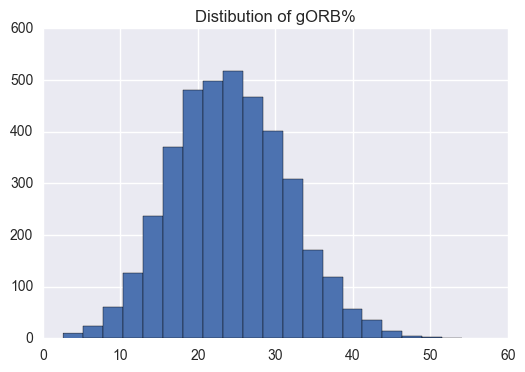

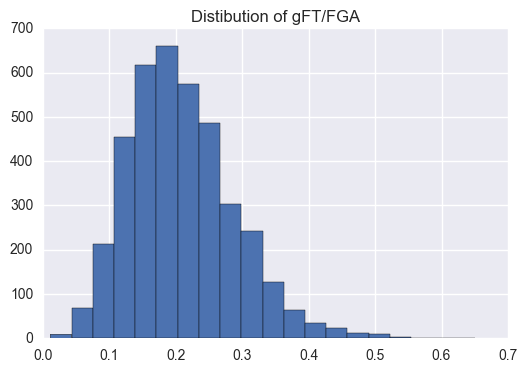

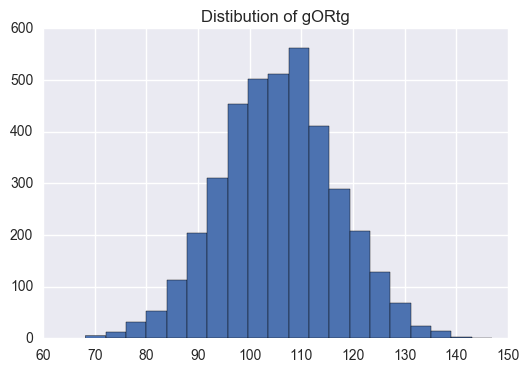

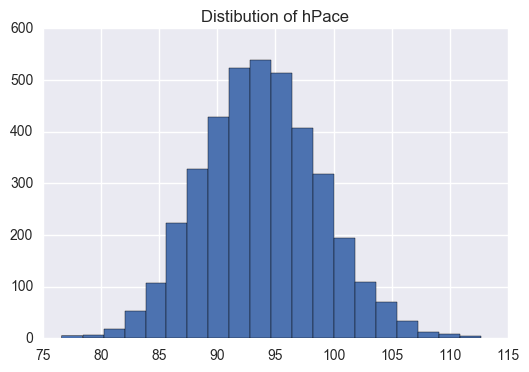

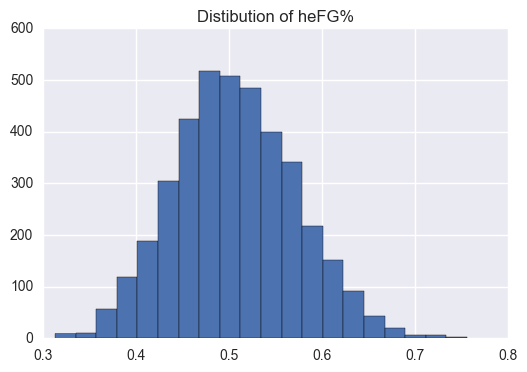

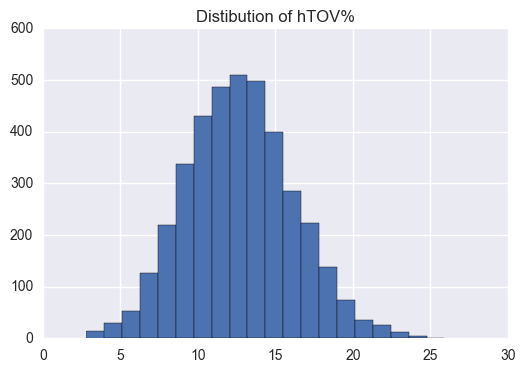

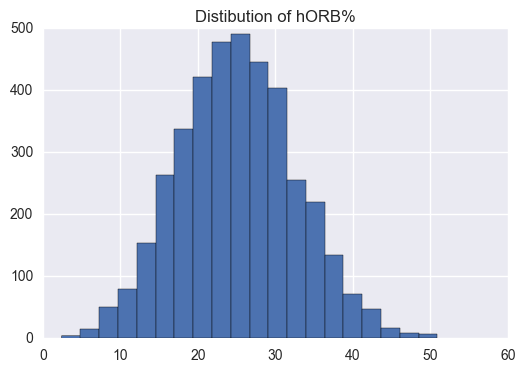

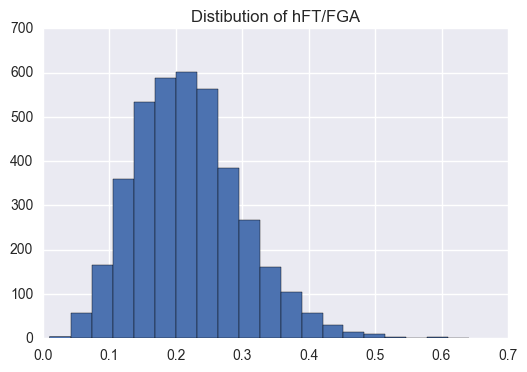

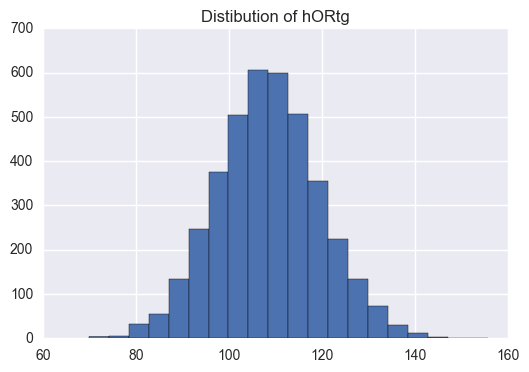

In [107]:
for col in games_corr.columns :
    plt.hist(games_corr[col], bins=20)
    plt.title('Distibution of '+ col)
    plt.show()

In [99]:
# cols_general = ['Season','GameDate','GameTime','HostName','GuestName','host_shortname','GameId']
# cols_scores = ['gq1','gq2','gq3','gq4','got1','got2','got3','got4','GuestScore','hq1','hq2','hq3','hq4','hot1','hot2','hot3','hot4','HostScore']
# cols_four_factors = ['gPace','geFG%','gTOV%','gORB%','gFT/FGA','gORtg','hPace','heFG%','hTOV%','hORB%','hFT/FGA','hORtg']
# cols_advanced = [x for x in games.columns if x not in cols_general+cols_scores+cols_four_factors ]

# cols_simple = [x for x in games.columns if x not in (cols_advanced + cols_general + cols_scores)]  